<a href="https://colab.research.google.com/github/David-S-Botero/RegressionProblem/blob/main/RegressionProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from keras.datasets import boston_housing
from keras import layers, models, optimizers, regularizers
import matplotlib.pyplot as plt


In [2]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [3]:
train_data.shape


(404, 13)

In [4]:
train_labels[0]

15.2

In [5]:
train_data = (train_data - train_data.mean(axis=0))/train_data.std(axis=0)
train_data

test_data = (test_data-train_data.mean(axis=0))/train_data.std(axis=0)

In [43]:
def build_regression_model(lr_var, input_data):
  model = models.Sequential()  
  model.add(layers.Dense(32, activation=layers.LeakyReLU(alpha=0.01), input_shape=(input_data,), kernel_regularizer=regularizers.l1_l2(0.01)))
  model.add(layers.Dropout(0.25))
  model.add(layers.Dense(32,activation=layers.LeakyReLU(alpha=0.01), kernel_regularizer=regularizers.l1(0.01)))
  model.add(layers.Dropout(0.25))
  model.add(layers.Dense(1))
  model.compile(optimizer=optimizers.RMSprop(lr=lr_var), loss='mse', metrics=['mae'])
  return model

### K-Fold Validation

In [44]:
# K-fold validation
k = 4 #num of split
num_val_samples = len(train_data)//k
num_epoch = 200
all_history = []

In [45]:
for i in range(k):
  print(f'Fold: {i}')
  val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
  val_target = train_labels[i*num_val_samples:(i+1)*num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]]
      , axis=0
  )
  partial_train_target = np.concatenate(
      [train_labels[:i*num_val_samples],train_labels[(i+1)*num_val_samples:]]
      , axis=0
  )
  model = build_regression_model(0.001,13)
  history = model.fit(partial_train_data, partial_train_target, epochs = num_epoch, batch_size=16, validation_data=(val_data, val_target), verbose=0)
  all_history.append(history.history['val_mae'])

Fold: 0


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Fold: 1
Fold: 2
Fold: 3


In [46]:
all_mae_avg = pd.DataFrame(all_history).mean(axis=0)
all_mae_avg

0      21.385043
1      20.344333
2      18.978958
3      17.207363
4      15.048980
         ...    
195     2.485857
196     2.492642
197     2.445810
198     2.519858
199     2.502321
Length: 200, dtype: float64

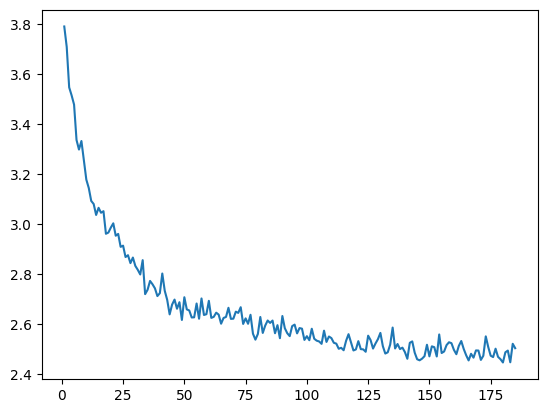

In [47]:
plt.plot(range(1,len(all_mae_avg[15:])+1), all_mae_avg[15:])

In [48]:
pd.DataFrame(all_history).mean(axis =0)

0      21.385043
1      20.344333
2      18.978958
3      17.207363
4      15.048980
         ...    
195     2.485857
196     2.492642
197     2.445810
198     2.519858
199     2.502321
Length: 200, dtype: float64

In [49]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 4ms/step - loss: 2679942.2500 - mae: 1583.8102


[2679942.25, 1583.8101806640625]